# **DATA 6545 Course Project 1: Advanced Preparation of Financial Data**

## **Overview of the Project:** 

Understanding pricing strategies in the context of the Initial Public Offering (IPO) process has been receiving much attention. Most prior studies have however focused on information sources from post issuance periods, and understanding such strategies from the management’s perspective during the IPO process is still an open research issue. In this study, we analyze the inter-relationships between the management’s confidence (through the proxy of sentiments expressed in textual contents in the Management’s Discussion & Analysis (MD&A) sections in the prospectus) and the pre-/post-IPO valuations.

The client is seeking advanced and novel methods to **prepare the collected data, for further predictive analysis of the “underpricing” phenomenon**. You will mainly focus on the data understanding and data preparation phases in the CRISP-DM model. Advanced preparation and modeling techniques will be needed for extra points.



### **Research Question:**

The overarching research question is **“ How to predict the IPO underpricing phenomena?** ” In this competition, your main purpose is to prepare the data for predictive models answering the overarching research question. You can also come up with additional RQs such as "what are the determinants of the PO underpricing phenomena?"

***State assumptiomns in the code ***

#**Dataset Overview**

Loading data and establishing new column names/values

In [ ]:
# importing requried python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import PowerTransformer
import scipy
import seaborn as sns 

In [ ]:
colnames_dict = {
    'P(IPO)':'offer_price',
    'P(H)': 'price_range_higher_bound',
    'P(L)': 'price_range_lower_bound',
    'P(1Day)':'first_day_trading_price',
    'C1':'days',
    'C2':'top_tier_dummy',
    'C3':'earnings_per_share',
    'C4':'prior_nasdaq_15day_returns',
    'C5':'outstanding_shares',
    'C6':'offering_shares',
    'C7':'sales',
    'T1':'num_of_sentences',
    'T2':'num_of_words',
    'T3':'num_of_real_words',
    'T4':'num_of_long_sentences',
    'T5':'num_of_long_words',
    'S1':'num_of_positive_words',
    'S2':'num_of_negative_words',
    'S3':'num_of_uncertain_words',
    'I1':'ticker',
    'I2':'company_name',
    'I3':'std_industry_classifier'
  }

In [ ]:
# Reads the data from a github repository and stores it in a dataframe.
url = "https://github.com/SindhuraGopalaRao/Advanced-Preparation-of-Financial-Data/blob/main/Competition1_raw_data.xlsx?raw=true"
ipo_df = pd.read_excel(url)

ipo_df.rename(columns=colnames_dict,inplace=True)

In [ ]:
# Understanding the data and datatypes for the features
ipo_df.head()

,ticker,company_name,std_industry_classifier,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,earnings_per_share,...,offering_shares,sales,num_of_sentences,num_of_words,num_of_real_words,num_of_long_sentences,num_of_long_words,num_of_positive_words,num_of_negative_words,num_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.87,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.25,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.7,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.39,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


#**Converting Data Types 1**

Changing the data types of the inital columns in the dataframe

In [ ]:
# convert data types to float
to_float = ['offer_price','price_range_higher_bound', 'price_range_lower_bound', 'first_day_trading_price', 'days', 'top_tier_dummy', 'earnings_per_share', 'prior_nasdaq_15day_returns', 'outstanding_shares', 'offering_shares', 'sales', 'num_of_sentences', 'num_of_words', 'num_of_real_words', 'num_of_long_sentences', 'num_of_long_words', 'num_of_positive_words', 'num_of_negative_words', 'num_of_uncertain_words']
#Does NOT include Std Industry Classifier 
for column in to_float:
    ipo_df[column]=pd.to_numeric(ipo_df[column], errors='coerce')
ipo_df.dtypes

ticker                         object
company_name                   object
std_industry_classifier        object
offer_price                   float64
price_range_higher_bound      float64
price_range_lower_bound       float64
first_day_trading_price       float64
days                          float64
top_tier_dummy                float64
earnings_per_share            float64
prior_nasdaq_15day_returns    float64
outstanding_shares            float64
offering_shares               float64
sales                         float64
num_of_sentences              float64
num_of_words                  float64
num_of_real_words             float64
num_of_long_sentences         float64
num_of_long_words             float64
num_of_positive_words         float64
num_of_negative_words         float64
num_of_uncertain_words        float64
dtype: object

In [ ]:
# counting how many NaN values in each column
ipo_df.isna().sum()

ticker                         0
company_name                   0
std_industry_classifier        0
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
earnings_per_share            36
prior_nasdaq_15day_returns    22
outstanding_shares             6
offering_shares                6
sales                         72
num_of_sentences               1
num_of_words                   1
num_of_real_words              1
num_of_long_sentences          1
num_of_long_words              1
num_of_positive_words          1
num_of_negative_words          1
num_of_uncertain_words         1
dtype: int64

#Setting Rules for columns
Creating the structure for what each column can or cannot be in there



*   Columns that can have no negative values
*   Columns that can only be 0 or 1
*   Columns that cannot be negative OR 0
*   Specific relations to columns (one cannot be greater than the other, etc.)





In [ ]:
## T1, T2, C5 - they have to be greater than 0
greater_zero = ['num_of_sentences','num_of_words','outstanding_shares']

def pos_col_nan(df, col_names):
  for col_name in col_names:
    df[col_name] = np.where(df[col_name]>0, df[col_name], np.nan) #can be done with 3 functions or do 1 one function with the if criteria
  return df

ipo_df = pos_col_nan(ipo_df, greater_zero)

In [ ]:
#column names that have rule of no negative/zero values
col_names_p =['offer_price','days','offering_shares','sales', 'num_of_real_words','num_of_long_sentences','num_of_long_words','num_of_positive_words','num_of_negative_words','num_of_uncertain_words',] #currently has c values, others would need to be added

def pos_col_nan(df, col_names):
  for col_name in col_names:
    df[col_name] = np.where(df[col_name]>=0, df[col_name], np.nan) #can be done with 3 functions or do 1 one function with the if criteria
  return df

ipo_df = pos_col_nan(ipo_df, col_names_p)

In [ ]:
# understanding the basic information of the data

def all_about_data(ipo_df):
    print("Some basic information about the data:\n")

    #shape of the dataframe
    print("Number of rows:",ipo_df.shape[0])
    print("Number of columns:",ipo_df.shape[1])

    #List column names
    print("\nColumn Names:")
    print(ipo_df.columns)

    #data types for each column in the dataframe 
    print("\nDatatype of each columns:")
    print("Dataypes:",ipo_df.dtypes)

    #summary stats
    print("\nSummary Stats:")
    print(ipo_df.describe())

    #missing value inspection 
    print("\nMissing Values:")
    print(ipo_df.isna().sum())

all_about_data(ipo_df)

Some basic information about the data:

Number of rows: 682
Number of columns: 22

Column Names:
Index(['ticker', 'company_name', 'std_industry_classifier', 'offer_price',
       'price_range_higher_bound', 'price_range_lower_bound',
       'first_day_trading_price', 'days', 'top_tier_dummy',
       'earnings_per_share', 'prior_nasdaq_15day_returns',
       'outstanding_shares', 'offering_shares', 'sales', 'num_of_sentences',
       'num_of_words', 'num_of_real_words', 'num_of_long_sentences',
       'num_of_long_words', 'num_of_positive_words', 'num_of_negative_words',
       'num_of_uncertain_words'],
      dtype='object')

Datatype of each columns:
Dataypes: ticker                         object
company_name                   object
std_industry_classifier        object
offer_price                   float64
price_range_higher_bound      float64
price_range_lower_bound       float64
first_day_trading_price       float64
days                          float64
top_tier_dummy            

In [ ]:
# replacing '-' with NaN
ipo_df.replace(to_replace="-", value=np.nan, inplace=True)

Text(0, 0.5, 'Count of Missing Value')

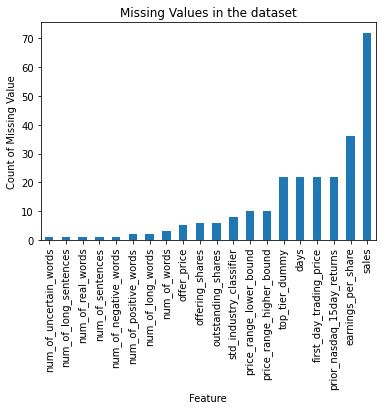

In [ ]:
# visualizing the missing values
missing_val = ipo_df.isna().sum()
missing_val = missing_val[missing_val > 0]
missing_val.sort_values(inplace=True)
missing_val.plot.bar()

plt.title('Missing Values in the dataset')
plt.xlabel('Feature')
plt.ylabel('Count of Missing Value')

In [ ]:
#check data with a row that you know has significant values missing
ipo_df.loc[[10]]

,ticker,company_name,std_industry_classifier,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,earnings_per_share,...,offering_shares,sales,num_of_sentences,num_of_words,num_of_real_words,num_of_long_sentences,num_of_long_words,num_of_positive_words,num_of_negative_words,num_of_uncertain_words
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0


#**Imputation/standardization**
*   Choosing which companies to drop for future analysis
*   List item

*   Replacing all NAN values with Mean or Mode
*   Checking skewness and distribution of variables 








In [ ]:
# drop first_day_trading_price (i.e,P(1Day)) values that has missing data. since this is used for as target variable (no impute on missing data). 

ipo_df = ipo_df.dropna(subset=['first_day_trading_price'])
#Shape of the dataset now (should have dropped 22 rows to now be 660)
ipo_df.shape

(660, 22)

In [ ]:
#median for each column
ipo_df.median().round(2)

<ipython-input-14-df4d53a405d1>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ipo_df.median().round(2)


offer_price                         13.75
price_range_higher_bound            15.50
price_range_lower_bound             13.00
first_day_trading_price             14.85
days                               107.00
top_tier_dummy                       1.00
earnings_per_share                   0.00
prior_nasdaq_15day_returns           0.01
outstanding_shares            27454378.00
offering_shares                7500000.00
sales                              107.46
num_of_sentences                   446.00
num_of_words                     12128.00
num_of_real_words                10829.50
num_of_long_sentences              280.00
num_of_long_words                  627.00
num_of_positive_words               60.00
num_of_negative_words              101.50
num_of_uncertain_words             135.00
dtype: float64

In [ ]:
#replacing null values in columns USING MEDIAN AND MODE (will have to be adjusted depending on the decision in "Added Columns")
#try before the calculations so

ipo_df['offer_price'].fillna(ipo_df['offer_price'].median(), inplace=True)
ipo_df['price_range_higher_bound'].fillna(ipo_df['price_range_higher_bound'].median(), inplace=True)
ipo_df['price_range_lower_bound'].fillna(ipo_df['price_range_lower_bound'].median(), inplace=True)
ipo_df['first_day_trading_price'].fillna(ipo_df['first_day_trading_price'].median(), inplace=True)
ipo_df['days'].fillna(ipo_df['days'].median(), inplace=True)
ipo_df['top_tier_dummy'].fillna(ipo_df['top_tier_dummy'].mode()[0], inplace=True)
ipo_df['earnings_per_share'].fillna(ipo_df['earnings_per_share'].median(), inplace=True)
ipo_df['prior_nasdaq_15day_returns'].fillna(ipo_df['prior_nasdaq_15day_returns'].median(), inplace=True)
ipo_df['outstanding_shares'].fillna(ipo_df['outstanding_shares'].median(), inplace=True)
ipo_df['offering_shares'].fillna(ipo_df['offering_shares'].median(), inplace=True)
ipo_df['sales'].fillna(ipo_df['sales'].median(), inplace=True)
ipo_df['num_of_sentences'].fillna(ipo_df['num_of_sentences'].median(), inplace=True)
ipo_df['num_of_words'].fillna(ipo_df['num_of_words'].median(), inplace=True)
ipo_df['num_of_real_words'].fillna(ipo_df['num_of_real_words'].median(), inplace=True)
ipo_df['num_of_long_sentences'].fillna(ipo_df['num_of_long_sentences'].median(), inplace=True)
ipo_df['num_of_long_words'].fillna(ipo_df['num_of_long_words'].median(), inplace=True)
ipo_df['num_of_positive_words'].fillna(ipo_df['num_of_positive_words'].median(), inplace=True)
ipo_df['num_of_negative_words'].fillna(ipo_df['num_of_negative_words'].median(), inplace=True)
ipo_df['num_of_uncertain_words'].fillna(ipo_df['num_of_uncertain_words'].median(), inplace=True)


In [ ]:
# checking to make sure there are no NaN values
ipo_df.isna().sum()

ticker                        0
company_name                  0
std_industry_classifier       0
offer_price                   0
price_range_higher_bound      0
price_range_lower_bound       0
first_day_trading_price       0
days                          0
top_tier_dummy                0
earnings_per_share            0
prior_nasdaq_15day_returns    0
outstanding_shares            0
offering_shares               0
sales                         0
num_of_sentences              0
num_of_words                  0
num_of_real_words             0
num_of_long_sentences         0
num_of_long_words             0
num_of_positive_words         0
num_of_negative_words         0
num_of_uncertain_words        0
dtype: int64

# Binning

In [ ]:
#Turning off the warning
pd.set_option('mode.chained_assignment', None)

In [ ]:
# Convert std_industry_classifier to string     
ipo_df['std_industry_classifier'] = ipo_df['std_industry_classifier'].astype(str)

### Assumption : assuming that the first value in the column for the std_industry_classifier is the one to be considered
# Get the first number from the 'std_industry_classifier' column
ipo_df['std_industry_classifier'] = ipo_df['std_industry_classifier'].str.split(',').str[0]

# Print dataframe
ipo_df.head()

,ticker,company_name,std_industry_classifier,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,earnings_per_share,...,offering_shares,sales,num_of_sentences,num_of_words,num_of_real_words,num_of_long_sentences,num_of_long_words,num_of_positive_words,num_of_negative_words,num_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


In [ ]:
# Standard Industry Classifier(I3) classified by SIC code

def classification(sic_code):
    
    if sic_code < 999:
        return "Agriculture,Forestry,Fishing"
    elif sic_code >= 1000 and sic_code <= 1499:
        return "Mining"
    elif sic_code >= 1500 and sic_code <= 1799:
        return "Construction"
    elif sic_code >= 2000 and sic_code <= 3999:
        return "Manufacturing"
    elif sic_code >= 4000 and sic_code <= 4999:
        return "Transportation,Communications,Electric,gas,Sanitary" 
    elif sic_code >= 5000 and sic_code <= 5199:
        return "Wholesale Trade"
    elif sic_code >= 5200 and sic_code <= 5999:
        return "Retail Trade"
    elif sic_code >= 6000 and sic_code <= 6799:
        return "Finance,Insurance,RealEstate"
    elif sic_code >= 7000 and sic_code <= 8999:
        return "Services"
    elif sic_code >= 9100 and sic_code <= 9799:
        return 'Public Administration'
    elif sic_code >= 9800:
        return "Nonclassifiable"

In [ ]:
# converting std_industry_classifier column to float datatype
ipo_df['std_industry_classifier'] = ipo_df['std_industry_classifier'].astype(float)

In [ ]:
ipo_df['std_industry_classifier'] = ipo_df['std_industry_classifier'].apply(lambda x: classification(x))

In [ ]:
# further group the above classified group into Manufacturing, Services and Others to reduce the number of features.

#binning all the values except manufacturing and Services into 'Other'
ipo_df['std_industry_classifier'] = ipo_df['std_industry_classifier'].replace(['Transportation,Communications,Electric,gas,Sanitary','Retail Trade','Mining', 'Wholesale Trade', 'Finance,Insurance,RealEstate', 
                                            'Agriculture,Forestry,Fishing', 'Nonclassifiable','Construction'],'Other')



In [ ]:
#Create 3 bins for std_industry_classifier - Manufacturing = 1, Services=2, and Other=3
ipo_df['std_industry_classifier'] = ipo_df['std_industry_classifier'].replace({'Manufacturing': 1, 'Services': 2, 'Other': 3})

ipo_df['Manufacturing'] = np.where(ipo_df['std_industry_classifier'] ==1, 1, 0)
ipo_df['Services'] = np.where(ipo_df['std_industry_classifier'] ==2, 1, 0)
ipo_df['Other'] = np.where(ipo_df['std_industry_classifier'] ==3, 1, 0)

ipo_df.head(10)

,ticker,company_name,std_industry_classifier,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,earnings_per_share,...,num_of_words,num_of_real_words,num_of_long_sentences,num_of_long_words,num_of_positive_words,num_of_negative_words,num_of_uncertain_words,Manufacturing,Services,Other
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,1,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,1,0,0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,1,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,1,0,0
2,ACAD,ACADIA PHARMACEUTICALS INC,1,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,1,0,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,1,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,1,0,0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,3,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,0,1
5,ACOM,Ancestry.com Inc.,2,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0,0,1,0
6,ACOR,ACORDA THERAPEUTICS INC,1,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0,1,0,0
7,ACRX,ACELRX PHARMACEUTICALS INC,1,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,11226.0,10056.0,276.0,627.0,55.0,120.0,122.0,1,0,0
8,ACTV,ACTIVE NETWORK INC,2,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0,0,1,0
9,ACW,ACCURIDE CORP,1,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0,1,0,0


Text(0, 0.5, 'Count')

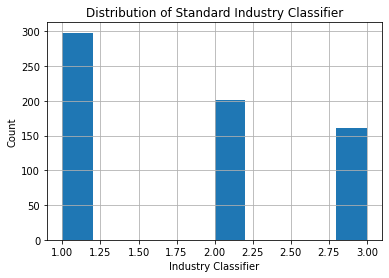

In [ ]:
# visualizing the distribution of stdandard industry classifier 
ipo_df['std_industry_classifier'].hist()
plt.title("Distribution of Standard Industry Classifier")
plt.xlabel("Industry Classifier")
plt.ylabel("Count")

In [ ]:
#export SIC binning to csv file
ipo_df.to_csv('SIC_Binning', ',')

#**Adding Columns**

Adding new columns and calculations. 




In [ ]:
#creating target variables

ipo_df['Avg_Price'] = (ipo_df['price_range_higher_bound'] + ipo_df['price_range_lower_bound']) / 2

#calculating Y1 - Set to 1 if P(IPO) < P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0
ipo_df['Pre_IPO_Price_Revision'] = np.where(ipo_df['offer_price'] < ipo_df['Avg_Price'],1,0)

#calculating Y2 - Set to 1 if P(IPO) < P(1Day), otherwise 0
ipo_df['Post_IPO_Initial_Return'] = np.where(ipo_df['offer_price'] < ipo_df['first_day_trading_price'],1,0)

#calculating C3' - Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0
ipo_df["Positive_EPS_Dummy"] = np.where(ipo_df['earnings_per_share'] > 0, 1, 0)

#calculating C5' - C5’ = C5/C6 
ipo_df["Share_Overhang"] = ipo_df['outstanding_shares'] / ipo_df['offering_shares']

#calculating C6 - Set to (P(IPO) – P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0 
ipo_df["Up_Revision"] = np.where(ipo_df['offer_price'] > ipo_df['Avg_Price'], ((ipo_df['offer_price'] - ipo_df['Avg_Price']) / ipo_df['Avg_Price']) * 100,0)

In [ ]:
# ratio of long sentences - T4/T1 as T1_prime
ipo_df['T1_prime'] = ipo_df['num_of_long_sentences'] / ipo_df['num_of_sentences']

# ratio of long words - T2_prime
ipo_df['T2_prime'] = ipo_df['num_of_long_words'] / ipo_df['num_of_words']

# ratio of real words - T3_prime
ipo_df['T3_prime'] = ipo_df['num_of_real_words'] / ipo_df['num_of_words']

# ratio of positive words - S1/T2 as S1_prime
ipo_df['S1_prime'] = ipo_df['num_of_positive_words'] / ipo_df['num_of_words']

# ratio of negative words - S2_prime
ipo_df['S2_prime'] = ipo_df['num_of_negative_words'] / ipo_df['num_of_words']

# ratio of uncertain words - S3_prime
ipo_df['S3_prime'] = ipo_df['num_of_uncertain_words'] / ipo_df['num_of_words']

print(ipo_df[['T1_prime', 'T2_prime', 'T3_prime', 'S1_prime', 'S2_prime','S3_prime']])

     T1_prime  T2_prime  T3_prime  S1_prime  S2_prime  S3_prime
0    0.640426  0.054250  0.908876  0.004875  0.009199  0.010929
1    0.644753  0.051395  0.898724  0.003258  0.011105  0.010876
2    0.636816  0.061764  0.909350  0.011593  0.006271  0.011403
3    0.539634  0.061630  0.917060  0.009686  0.007144  0.013319
4    0.587413  0.048550  0.888469  0.004518  0.010047  0.011261
..        ...       ...       ...       ...       ...       ...
677  0.612663  0.050603  0.920952  0.006512  0.007935  0.012950
678  0.647177  0.056770  0.906227  0.005069  0.009124  0.012527
679  0.647761  0.047976  0.889600  0.004191  0.009044  0.009926
680  0.710938  0.043178  0.909412  0.006773  0.005362  0.014110
681  0.670702  0.054545  0.904288  0.008062  0.008834  0.013551

[660 rows x 6 columns]


In [ ]:
ipo_df.columns

Index(['ticker', 'company_name', 'std_industry_classifier', 'offer_price',
       'price_range_higher_bound', 'price_range_lower_bound',
       'first_day_trading_price', 'days', 'top_tier_dummy',
       'earnings_per_share', 'prior_nasdaq_15day_returns',
       'outstanding_shares', 'offering_shares', 'sales', 'num_of_sentences',
       'num_of_words', 'num_of_real_words', 'num_of_long_sentences',
       'num_of_long_words', 'num_of_positive_words', 'num_of_negative_words',
       'num_of_uncertain_words', 'Manufacturing', 'Services', 'Other',
       'Avg_Price', 'Pre_IPO_Price_Revision', 'Post_IPO_Initial_Return',
       'Positive_EPS_Dummy', 'Share_Overhang', 'Up_Revision', 'T1_prime',
       'T2_prime', 'T3_prime', 'S1_prime', 'S2_prime', 'S3_prime'],
      dtype='object')

In [ ]:
ipo_df= ipo_df.drop(['offer_price',
       'price_range_higher_bound', 'price_range_lower_bound',
       'first_day_trading_price','Avg_Price', 'earnings_per_share', 'outstanding_shares', 'offering_shares','num_of_sentences',
       'num_of_words', 'num_of_real_words', 'num_of_long_sentences',
       'num_of_long_words', 'num_of_positive_words', 'num_of_negative_words',
       'num_of_uncertain_words' ],axis=1)

# Creation of Different Variables (Cont., Cat., Target) and Graphs

In [ ]:
num_cols = ['days', 'prior_nasdaq_15day_returns', 'sales', 'Share_Overhang', 'Up_Revision', 'T1_prime', 'T2_prime', 'T3_prime', 'S1_prime', 'S2_prime', 'S3_prime']

In [ ]:
ipo_df_cont = ipo_df.loc[:, num_cols]
ipo_df_cont.head()

,days,prior_nasdaq_15day_returns,sales,Share_Overhang,Up_Revision,T1_prime,T2_prime,T3_prime,S1_prime,S2_prime,S3_prime
0,122.0,0.029074,51.345,3.864345,11.111111,0.640426,0.054250,0.908876,0.004875,0.009199,0.010929
1,259.0,-0.013352,25.936,12.028832,0.000000,0.644753,0.051395,0.898724,0.003258,0.011105,0.010876
2,90.0,0.020715,7.378,3.369134,0.000000,0.636816,0.061764,0.909350,0.011593,0.006271,0.011403
3,209.0,0.020023,8.526,3.299697,0.000000,0.539634,0.061630,0.917060,0.009686,0.007144,0.013319
4,80.0,-0.034895,632.298,3.726269,5.000000,0.587413,0.048550,0.888469,0.004518,0.010047,0.011261


<AxesSubplot:>

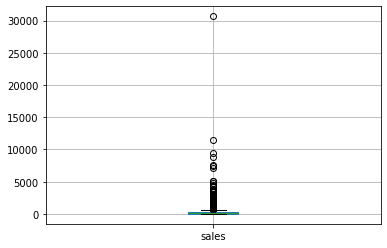

In [ ]:
ipo_df_cont.boxplot(column = 'sales')

<AxesSubplot:>

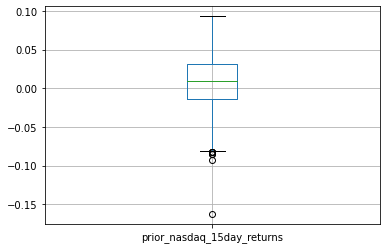

In [ ]:
ipo_df_cont.boxplot(column = 'prior_nasdaq_15day_returns')

<AxesSubplot:>

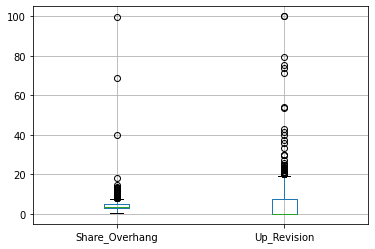

In [ ]:
ipo_df_cont.boxplot(column = ['Share_Overhang', 'Up_Revision'])

<AxesSubplot:>

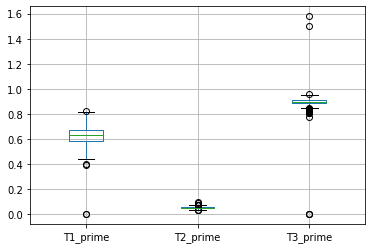

In [ ]:
ipo_df_cont.boxplot(column = ['T1_prime', 'T2_prime', 'T3_prime'])

<AxesSubplot:>

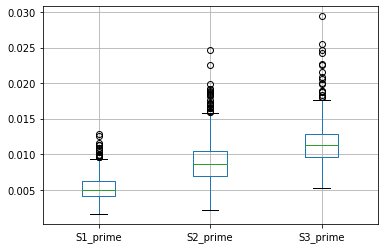

In [ ]:
ipo_df_cont.boxplot(column = ['S1_prime', 'S2_prime', 'S3_prime'])

In [ ]:
ipo_df_cat = ipo_df.loc[:, ipo_df.columns[~ipo_df.columns.isin(num_cols)]]
ipo_df_cat.head()

,ticker,company_name,std_industry_classifier,top_tier_dummy,Manufacturing,Services,Other,Pre_IPO_Price_Revision,Post_IPO_Initial_Return,Positive_EPS_Dummy
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,1,1.0,1,0,0,0,1,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,1,0.0,1,0,0,1,0,0
2,ACAD,ACADIA PHARMACEUTICALS INC,1,1.0,1,0,0,1,0,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,1,1.0,1,0,0,1,1,0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,3,1.0,0,0,1,0,1,1


array([[<AxesSubplot:title={'center':'std_industry_classifier'}>,
        <AxesSubplot:title={'center':'top_tier_dummy'}>,
        <AxesSubplot:title={'center':'Manufacturing'}>],
       [<AxesSubplot:title={'center':'Services'}>,
        <AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Pre_IPO_Price_Revision'}>],
       [<AxesSubplot:title={'center':'Post_IPO_Initial_Return'}>,
        <AxesSubplot:title={'center':'Positive_EPS_Dummy'}>,
        <AxesSubplot:>]], dtype=object)

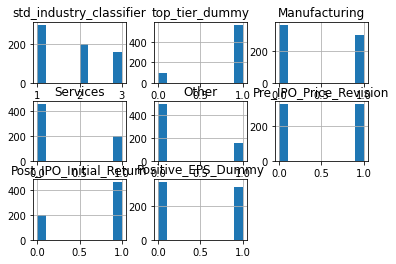

In [ ]:
ipo_df_cat.hist()

In [ ]:
ipo_df_target = ipo_df.loc[:, ['Pre_IPO_Price_Revision','Post_IPO_Initial_Return']]
ipo_df_target.head()

,Pre_IPO_Price_Revision,Post_IPO_Initial_Return
0,0,1
1,1,0
2,1,0
3,1,1
4,0,1


<AxesSubplot:>

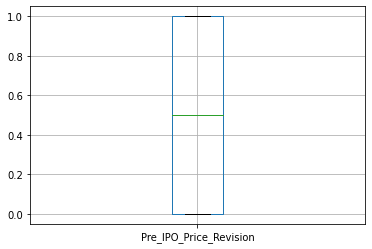

In [ ]:
ipo_df_target.boxplot(column = 'Pre_IPO_Price_Revision')

<AxesSubplot:>

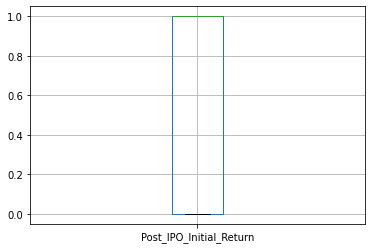

In [ ]:
ipo_df_target.boxplot(column = 'Post_IPO_Initial_Return')

In [ ]:
ipo_df_cat = ipo_df_cat.drop(['Pre_IPO_Price_Revision','Post_IPO_Initial_Return', 'ticker', 'company_name'], axis=1)
ipo_df_cat.head()

,std_industry_classifier,top_tier_dummy,Manufacturing,Services,Other,Positive_EPS_Dummy
0,1,1.0,1,0,0,1
1,1,0.0,1,0,0,0
2,1,1.0,1,0,0,0
3,1,1.0,1,0,0,0
4,3,1.0,0,0,1,1


# Process Work
1. Left Skewed/Right Skewed
2. x_bar +- 3 * std
3. Z-score
4. Min/Max
5. IQR

In [ ]:
### left-skewed 
  ### mean < median 
### right-skewed
  ### mean > median
def skew(df):
  for col in df:
    if df[col].mean() > df[col].median():
      print(col,': right-skewed')
    else:
      print(col,': left-skewed')

left_right = skew(ipo_df_cont)

days : right-skewed
prior_nasdaq_15day_returns : left-skewed
sales : right-skewed
Share_Overhang : right-skewed
Up_Revision : right-skewed
T1_prime : left-skewed
T2_prime : right-skewed
T3_prime : left-skewed
S1_prime : right-skewed
S2_prime : right-skewed
S3_prime : right-skewed


In [ ]:
### x_bar +/- 3 * std
upper = ipo_df_cont.mean() + 3 * ipo_df_cont.std()
lower = ipo_df_cont.mean() - 3 * ipo_df_cont.std()
upper, lower

(days                           608.181189
 prior_nasdaq_15day_returns       0.107235
 sales                         5234.036924
 Share_Overhang                  19.817865
 Up_Revision                     38.037351
 T1_prime                         0.859777
 T2_prime                         0.073703
 T3_prime                         1.113325
 S1_prime                         0.010551
 S2_prime                         0.018058
 S3_prime                         0.020072
 dtype: float64, days                          -308.723613
 prior_nasdaq_15day_returns      -0.092671
 sales                        -4292.774188
 Share_Overhang                 -10.983354
 Up_Revision                    -27.228060
 T1_prime                         0.393663
 T2_prime                         0.030839
 T3_prime                         0.670207
 S1_prime                         0.000086
 S2_prime                         0.000059
 S3_prime                         0.002966
 dtype: float64)

In [ ]:
### z-score
  ### (value-mean)/std

def zscore(df):
  for col in df:
    eq = (df[col]-df[col].mean())/df[col].std()
    print(eq)

z_score = zscore(ipo_df_cont)
z_score

0     -0.181450
1      0.715044
2     -0.390851
3      0.387856
4     -0.456288
         ...   
677    1.094582
678   -0.338500
679   -0.246888
680   -0.469376
681    0.859007
Name: days, Length: 660, dtype: float64
0      0.654070
1     -0.619307
2      0.403174
3      0.382408
4     -1.265903
         ...   
677   -0.078414
678    1.542927
679    0.694620
680    0.750416
681    0.522400
Name: prior_nasdaq_15day_returns, Length: 660, dtype: float64
0     -0.264067
1     -0.280070
2     -0.291758
3     -0.291035
4      0.101818
         ...   
677   -0.179198
678   -0.280369
679   -0.261494
680   -0.222178
681    0.629136
Name: sales, Length: 660, dtype: float64
0     -0.107706
1      1.482716
2     -0.204171
3     -0.217698
4     -0.134602
         ...   
677   -0.088318
678    0.051129
679   -0.144873
680   -0.038876
681   -0.229228
Name: Share_Overhang, Length: 660, dtype: float64
0      0.524609
1     -0.496862
2     -0.496862
3     -0.496862
4     -0.037200
         ...   
677    

In [ ]:
###Min-max normalization is a technique used to transform data values into a range between 0 and 1

from sklearn.preprocessing import MinMaxScaler

def minmax(df):
    num_cols = [col for col in df if df[col].dtype != object]
    #df = df[num_cols].replace([np.inf, -np.inf], np.nan).dropna(axis=1)
    # create scaler
    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    return df_scaled

min_max = minmax(ipo_df_cont)
min_max

,days,prior_nasdaq_15day_returns,sales,Share_Overhang,Up_Revision,T1_prime,T2_prime,T3_prime,S1_prime,S2_prime,S3_prime
0,0.053924,0.749962,0.001671,0.035990,0.111111,0.775008,0.365450,0.575516,0.291209,0.313837,0.232749
1,0.119884,0.583748,0.000843,0.118042,0.000000,0.780245,0.319402,0.569087,0.147348,0.398734,0.230548
2,0.038517,0.717213,0.000238,0.031013,0.000000,0.770640,0.486665,0.575816,0.889070,0.183452,0.252440
3,0.095811,0.714502,0.000275,0.030315,0.000000,0.653036,0.484505,0.580698,0.719433,0.222305,0.332049
4,0.033702,0.499347,0.020605,0.034602,0.050000,0.710854,0.273510,0.562594,0.259462,0.351622,0.246559
...,...,...,...,...,...,...,...,...,...,...,...
655,0.147809,0.654351,0.006063,0.036990,0.200000,0.741411,0.306618,0.583162,0.436970,0.257535,0.316731
656,0.042369,0.865985,0.000827,0.044184,0.000000,0.783178,0.406117,0.573838,0.308491,0.310496,0.299162
657,0.049109,0.755255,0.001804,0.034072,0.000000,0.783885,0.264250,0.563309,0.230375,0.306931,0.191105
658,0.032740,0.762539,0.003839,0.039541,0.187500,0.860337,0.186841,0.575855,0.460154,0.142947,0.364933


In [ ]:
def iqr(df):
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        S = 1.5*IQR
        LB = Q1 - S
        UB = Q3 + S
        df.loc[df[col] > UB,col] = UB
        df.loc[df[col] < LB,col] = LB
        print(IQR)
    return df

iqr = iqr(ipo_df_cont)

70.25
0.045497759459585375
259.30600000000004
2.0072816467802106
7.6923076923076925
0.09413142722907841
0.008927834879127343
0.026275949727473935
0.0021222036137135214
0.0035551764241401043
0.0032689900306991197


# Skewness Transformation and Post Graphs

In [ ]:
# save this as a new variable 
pt = PowerTransformer()
skew_cont = pt.fit_transform(ipo_df_cont)
skew_cont

array([[ 0.0751656 ,  0.63452193, -0.54397101, ..., -0.15015278,
         0.22031437, -0.11830048],
       [ 1.78457188, -0.67774386, -0.92284592, ..., -1.35843738,
         0.86793412, -0.14051452],
       [-0.48264754,  0.35925121, -1.47258382, ...,  2.08689537,
        -1.04773943,  0.07688852],
       ...,
       [-0.08856698,  0.67981338, -0.49766435, ..., -0.6275518 ,
         0.16203007, -0.55255537],
       [-0.7224394 ,  0.74250187,  0.00329729, ...,  0.95708529,
        -1.52331258,  1.07856781],
       [ 1.80102407,  0.48900103,  1.55253744, ...,  1.55616882,
         0.08157676,  0.88640415]])

***For the `.skew()` method, if:***

-**If the skewness is between -0.5 and 0.5, the data are fairly symmetrical;**


**- If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are** **moderately skewed**


**-If the skewness is less than -1 or greater than 1, the data are highly skewed**

In [ ]:
ipo_df_cont.skew()

days                          0.836620
prior_nasdaq_15day_returns   -0.314465
sales                         1.177072
Share_Overhang                0.724354
Up_Revision                   1.201653
T1_prime                     -0.073967
T2_prime                      0.108610
T3_prime                     -0.545971
S1_prime                      0.611473
S2_prime                      0.694781
S3_prime                      0.480411
dtype: float64

<AxesSubplot:>

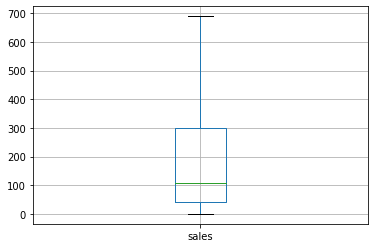

In [ ]:
ipo_df_cont.boxplot(column = 'sales')

<AxesSubplot:>

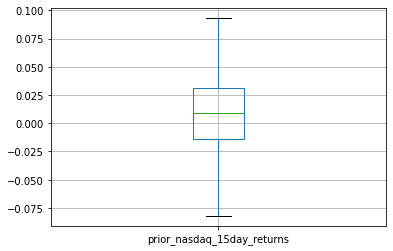

In [ ]:
ipo_df_cont.boxplot(column = 'prior_nasdaq_15day_returns')

<AxesSubplot:>

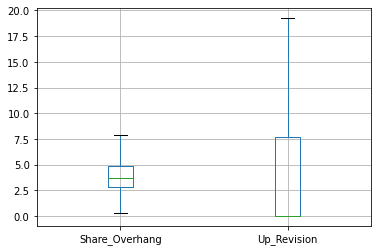

In [ ]:
ipo_df_cont.boxplot(column = [ 'Share_Overhang', 'Up_Revision'])

<AxesSubplot:>

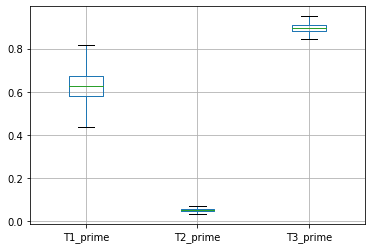

In [ ]:
ipo_df_cont.boxplot(column = ['T1_prime', 'T2_prime', 'T3_prime'])

<AxesSubplot:>

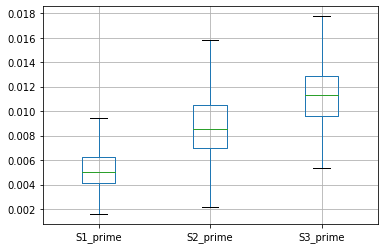

In [ ]:
ipo_df_cont.boxplot(column = ['S1_prime', 'S2_prime', 'S3_prime'])

array([[<AxesSubplot:title={'center':'std_industry_classifier'}>,
        <AxesSubplot:title={'center':'top_tier_dummy'}>],
       [<AxesSubplot:title={'center':'Manufacturing'}>,
        <AxesSubplot:title={'center':'Services'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Positive_EPS_Dummy'}>]],
      dtype=object)

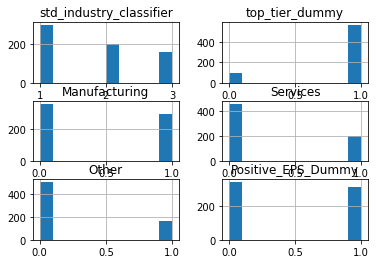

In [ ]:
ipo_df_cat.hist()

<AxesSubplot:>

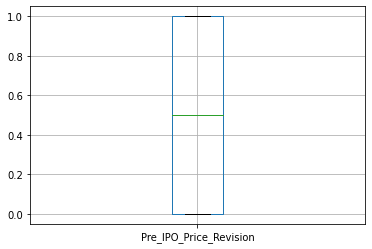

In [ ]:
ipo_df_target.boxplot(column = 'Pre_IPO_Price_Revision')

<AxesSubplot:>

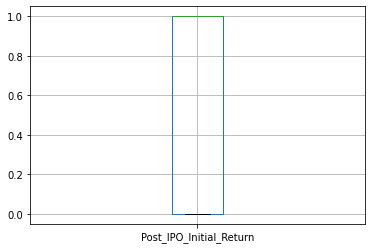

In [ ]:
ipo_df_target.boxplot(column = 'Post_IPO_Initial_Return')

In [ ]:
# take log of days
# sales you have to add the abs value of .min() +1  - to move to positive 
  # then do log 
# C6 prime - just add 1 to all values and then take the log 


# reading data, imputation, calculation, split data, process, merge OHE and processes together (need both for feature selection), feature selection
# box plots for cont
# bar chart for cat.
# have first round of EDA before processes and after 

# run feature selection 6 times
# save it as a csv and then run the csv in evaluation code
# Y1 and Y2 two right most columns 

# feature selection - cannot guarantee the same features for Y1 and Y2 
  # select a join for both 
  # x for the final data set 

# whatever we submit just lay out which ones we are selecting 
# dont have to have same number of features for Y1 and Y2

# layout all processes and label which one we chose
  # include evaluation result in our note

In [ ]:
## skewness removal

In [ ]:
# Log transformation of 'days'
days_log = np.log(ipo_df['days'])
days_log.skew()

0.13206924296483574

In [ ]:
# Log Transformation of 'sales'
sales_abs = ipo_df_cont['sales'] + abs(ipo_df_cont['sales'].min()) +1
sales_log = np.log(sales_abs)
sales_log.skew()

-0.8044187468055405

In [ ]:
# Log Transformation of C6 prime - 'Up_Revision'
up_one = ipo_df_cont['Up_Revision'] + 1
up_log = np.log(up_one)
up_log.skew()

0.6436265932144004

In [ ]:
# to merge OHE and Process
ipo_df_merge = pd.concat([ipo_df_target, ipo_df_cat, ipo_df_cont], axis =1) 
ipo_df_merge.head()

,Pre_IPO_Price_Revision,Post_IPO_Initial_Return,std_industry_classifier,top_tier_dummy,Manufacturing,Services,Other,Positive_EPS_Dummy,days,prior_nasdaq_15day_returns,sales,Share_Overhang,Up_Revision,T1_prime,T2_prime,T3_prime,S1_prime,S2_prime,S3_prime
0,0,1,1,1.0,1,0,0,1,122.0,0.029074,51.345,3.864345,11.111111,0.640426,0.054250,0.908876,0.004875,0.009199,0.010929
1,1,0,1,0.0,1,0,0,0,259.0,-0.013352,25.936,7.868826,0.000000,0.644753,0.051395,0.898724,0.003258,0.011105,0.010876
2,1,0,1,1.0,1,0,0,0,90.0,0.020715,7.378,3.369134,0.000000,0.636816,0.061764,0.909350,0.009440,0.006271,0.011403
3,1,1,1,1.0,1,0,0,0,209.0,0.020023,8.526,3.299697,0.000000,0.539634,0.061630,0.917060,0.009440,0.007144,0.013319
4,0,1,3,1.0,0,0,1,1,80.0,-0.034895,632.298,3.726269,5.000000,0.587413,0.048550,0.888469,0.004518,0.010047,0.011261


In [ ]:
ipo_df_merge.shape

(660, 19)

# Feature Selection

In [ ]:
X = pd.concat([ipo_df_cont, ipo_df_cat], axis =1).values

In [ ]:
y = ipo_df_target['Pre_IPO_Price_Revision'].values

In [ ]:
y2 = ipo_df_target['Post_IPO_Initial_Return'].values

In [ ]:
# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter
#### for ANOVA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
names = list(pd.concat([ipo_df_cont, ipo_df_cat], axis =1).columns)
names

['days',
 'prior_nasdaq_15day_returns',
 'sales',
 'Share_Overhang',
 'Up_Revision',
 'T1_prime',
 'T2_prime',
 'T3_prime',
 'S1_prime',
 'S2_prime',
 'S3_prime',
 'std_industry_classifier',
 'top_tier_dummy',
 'Manufacturing',
 'Services',
 'Other',
 'Positive_EPS_Dummy']

In [ ]:
def feature_selector(X, y, model, names, _method="topk", n=int(8), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT: 
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])

In [ ]:
#exclude up Up_Revision with Y1 but include with Y2

In [ ]:
selected_features1 = feature_selector(X, y, model=RandomForestClassifier(), names=names, fit_X=False)
selected_features1

Using the Top-K method: 
Selected features by correlation:  ['Positive_EPS_Dummy' 'Up_Revision' 'T2_prime' 'T3_prime' 'S2_prime'
 'S1_prime' 'prior_nasdaq_15day_returns' 'top_tier_dummy']
Selected features by RFE:  ['prior_nasdaq_15day_returns' 'sales' 'Share_Overhang' 'Up_Revision'
 'T2_prime' 'T3_prime' 'S1_prime' 'S2_prime']
Selected features by Ridge coefficients:  ['T3_prime' 'T1_prime' 'T2_prime' 'S2_prime' 'S1_prime' 'S3_prime'
 'Share_Overhang' 'Manufacturing']
Selected features by Extra Tree feature importance:  ['Up_Revision' 'S2_prime' 'T2_prime' 'Share_Overhang' 'S1_prime'
 'prior_nasdaq_15day_returns' 'T3_prime' 'T1_prime']
Selected features by Random Forest feature importance:  ['Up_Revision' 'S2_prime' 'sales' 'T2_prime' 'T3_prime' 'S1_prime'
 'prior_nasdaq_15day_returns' 'T1_prime']
T2_prime                      5
T3_prime                      5
S2_prime                      5
S1_prime                      5
Up_Revision                   4
prior_nasdaq_15day_returns    

array(['prior_nasdaq_15day_returns', 'Share_Overhang', 'Up_Revision',
       'T1_prime', 'T2_prime', 'T3_prime', 'S1_prime', 'S2_prime'],
      dtype='<U26')

In [ ]:
#alixing of df to import into the evaluation code - on column names 

In [ ]:
savetxt('Features1')

NameError: ignored

In [ ]:
pd.DataFrame(selected_features1).to_csv('Features', ',')

In [ ]:
# save this as a CSV
X.loc[:, selected_features]

In [ ]:
def feature_selector(X, y2, model, names, _method="topk", n=int(8), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT: 
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])

In [ ]:
selected_features2 = feature_selector(X, y2, model=RandomForestClassifier(), names=names, fit_X=False)
selected_features2

In [ ]:
pd.DataFrame(selected_features2).to_csv('Features 2', ',')